In [4]:
import os 
import cv2  
import numpy as np  
import matplotlib.pyplot as plt  
import random 
import pickle  

# Define the path to the images directory
path = 'dataset/train'

# Define the size to which each image will be resized (50x50 pixels)
size = 50

# Define the categories or classes of images
categories = ['lajthiza', 'spring', 'tepelena']

# Initialize an empty list to store the training data
training_data = []

# Define a function to create the training data
def create_training_data():
    # Loop through each category in the categories list
    for category in categories:
        # Construct the path to the current category's directory
        path_to_category = os.path.join(path, category)
        # Get the class number (index) of the current category
        class_num = categories.index(category)
        
        # Loop through each image in the current category's directory
        for img in os.listdir(path_to_category):
            try:
                # Read the image in grayscale mode
                img_array = cv2.imread(os.path.join(path_to_category, img), cv2.IMREAD_GRAYSCALE)
                # Resize the image to the defined size (50x50 pixels)
                new_array = cv2.resize(img_array, (size, size))
                # Append the resized image and its class number to the training data list
                training_data.append([new_array, class_num])
            except Exception as e:
                # If an error occurs (e.g., the file is not an image), ignore it and continue
                pass

# Call the function to create the training data
create_training_data()


In [5]:
# Shuffle the training data to ensure a good mix of images from different classes
random.shuffle(training_data)

# Initialize empty lists to hold features and labels
X = []
y = []

# Loop through the training data
for features, label in training_data:
    X.append(features)
    y.append(label)

# Convert the list of features to a numpy array and reshape it
# -1 means the number of samples, which will be inferred from the length of X
# (size, size, 1) represents the dimensions of each image (50x50 pixels, 1 channel for grayscale)
X = np.array(X).reshape(-1, size, size, 1)

# Convert the list of labels to a numpy array
y = np.array(y)

# Save the features (X) to a pickle file for later use
pickle_out = open('dataset/shrinked/X.pickle', 'wb')
pickle.dump(X, pickle_out)  # Serialize the numpy array X to the pickle file
pickle_out.close()  # Close the pickle file

# Save the labels (y) to a pickle file for later use
pickle_out = open('dataset/shrinked/y.pickle', 'wb')
pickle.dump(y, pickle_out)  # Serialize the numpy array y to the pickle file
pickle_out.close()  # Close the pickle file


(969, 50, 50, 1)
(969,)
[[[[139]
   [140]
   [141]
   ...
   [168]
   [171]
   [ 42]]

  [[141]
   [142]
   [141]
   ...
   [169]
   [173]
   [ 34]]

  [[149]
   [143]
   [144]
   ...
   [169]
   [177]
   [ 37]]

  ...

  [[ 24]
   [ 23]
   [ 18]
   ...
   [ 84]
   [ 67]
   [ 26]]

  [[ 32]
   [ 30]
   [ 26]
   ...
   [101]
   [139]
   [ 25]]

  [[ 38]
   [ 25]
   [ 22]
   ...
   [ 90]
   [136]
   [ 23]]]


 [[[157]
   [158]
   [159]
   ...
   [ 31]
   [ 33]
   [ 25]]

  [[158]
   [160]
   [159]
   ...
   [ 30]
   [ 32]
   [ 32]]

  [[160]
   [161]
   [160]
   ...
   [ 30]
   [ 29]
   [ 30]]

  ...

  [[ 22]
   [ 21]
   [ 21]
   ...
   [ 43]
   [ 26]
   [ 20]]

  [[ 22]
   [ 18]
   [ 21]
   ...
   [ 27]
   [ 26]
   [ 31]]

  [[ 20]
   [ 18]
   [ 18]
   ...
   [ 29]
   [ 27]
   [ 30]]]


 [[[138]
   [130]
   [147]
   ...
   [224]
   [213]
   [224]]

  [[146]
   [143]
   [138]
   ...
   [224]
   [221]
   [216]]

  [[175]
   [146]
   [153]
   ...
   [226]
   [214]
   [211]]

  ...

  [[12

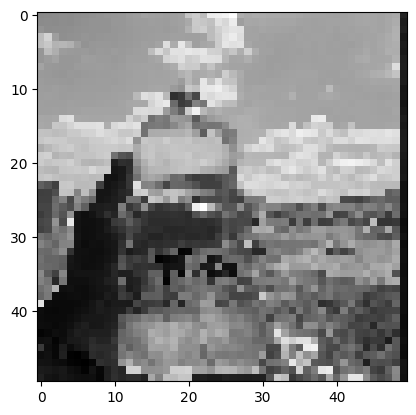

In [6]:
# Load the training data features from the pickle file
pickle_in = open('dataset/shrinked/X.pickle', 'rb') 
X = pickle.load(pickle_in)  

# Load the training data labels from the pickle file
pickle_in = open('dataset/shrinked/y.pickle', 'rb') 
y = pickle.load(pickle_in)  

# Print the shape of the features array
print(X.shape) 

# Print the shape of the labels array
print(y.shape)  

# Print the features data
print(X) 

# Print the labels data
print(y)  

# Display the first image in the features array
plt.imshow(X[0], cmap='gray')  
plt.show()  
